In [1]:
import spatialdata

sdata = spatialdata.read_zarr("/Volumes/ProstateCancerEvoMain/dbs/Ongoing/Region2/Region2_Xenium_Phen_HE_Integrated.ARMS_aligned.V6.ongoing.zarr")

/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
version mismatch: detected: RasterFormatV02, requested: FormatV04
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/Users/ugursahin/miniforge3/envs/SOPA/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'rea

In [ ]:
transf = spatialdata.transformations.get_transformation_between_coordinate_systems(sdata, '', 'global', intermediate_coordinate_systems='aligned')


NodeNotFound: source node pixels not in graph

In [3]:
sdata

SpatialData object, with associated Zarr store: /Volumes/ProstateCancerEvoMain/dbs/Ongoing/Region2/Region2_Xenium_Phen_HE_Integrated.ARMS_aligned.V6.ongoing.zarr
├── Images
│     ├── 'HE_Image': DataTree[cyx] (3, 14052, 23906), (3, 7026, 11953), (3, 3513, 5977), (3, 1757, 2989), (3, 878, 1494), (3, 439, 747)
│     ├── 'PhenoCycler_Image': DataTree[cyx] (25, 12563, 22914), (25, 6281, 11457), (25, 3140, 5728), (25, 1570, 2864), (25, 785, 1432)
│     ├── 'Xenium_Image': DataTree[cyx] (4, 34103, 54036), (4, 17051, 27018), (4, 8525, 13509), (4, 4262, 6754), (4, 2131, 3377)
│     └── '_20221020095443.ome': DataTree[cyx] (3, 114243, 79178), (3, 28560, 19794), (3, 7140, 4948), (3, 1785, 1237), (3, 446, 309)
├── Points
│     ├── 'HE_Marks': DataFrame with shape: (<Delayed>, 2) (2D points)
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── 'Tile_sample': GeoDataFrame shape: (1, 2) (2D shapes)
│     ├── 'cell_boundaries': GeoDataFrame shape: (299769, 2

In [4]:
sdata.shapes["cell_boundaries"]

,geometry,__old_index
aaaaaaaa-1,"POLYGON ((477.913 4855.413, 476.213 4857.325, ...",aaaaaaaa-1
aaaaaaab-1,"POLYGON ((475.575 4844.363, 475.363 4844.575, ...",aaaaaaab-1
aaaaaaac-1,"POLYGON ((462.825 4846.488, 461.975 4847.125, ...",aaaaaaac-1
aaaaaaad-1,"POLYGON ((550.163 4589.575, 548.463 4590.425, ...",aaaaaaad-1
aaaaaaae-1,"POLYGON ((558.237 3539.613, 557.388 3540.25, 5...",aaaaaaae-1
...,...,...
aaaejcpe-1,"POLYGON ((10241.65 4826.938, 10241.862 4827.36...",aaaejcpe-1
aaaejcpf-1,"POLYGON ((10184.913 4928.087, 10184.7 4928.3, ...",aaaejcpf-1
aaaejcpg-1,"POLYGON ((10317.938 4581.075, 10317.3 4581.288...",aaaejcpg-1
aaaejcph-1,"POLYGON ((10177.263 4526.675, 10176.2 4527.312...",aaaejcph-1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08717949..1.0].


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


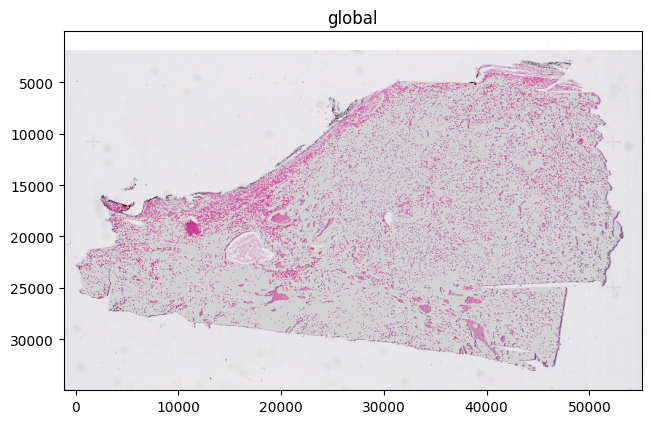

In [10]:
import spatialdata_plot
sdata.pl.render_images("HE_Image").pl.render_shapes("cell_boundaries").pl.show()

In [ ]:
from spatialdata import bounding_box_query

axes = plt.subplots(3, 1, figsize=(20, 13))[1].flatten()


def crop0(x):
    return bounding_box_query(
        x,
        min_coordinate=[20_000, 8000],
        max_coordinate=[22_000, 8500],
        axes=("x", "y"),
        target_coordinate_system="global",
    )


crop0(sdata).pl.render_images("he_image").pl.show(ax=axes[0], title="H&E image", coordinate_systems="global")
crop0(sdata).pl.render_images("morphology_focus").pl.show(
    ax=axes[1], title="Morphology image", coordinate_systems="global"
)
crop0(sdata).pl.render_labels("cell_labels").pl.show(ax=axes[2], title="Cell labels", coordinate_systems="global")